# Testing disease prevalence as explanatory variable for death rate

## Code book

### For Covid-19 data

#### Variables and their units

- We have the dataframe df_infected which contains the number of people tested positive on covid-19
- dates (columns): days of the year 2020 from end of January to today with the respective number of infected/deaths 
- deaths (entries of df_deaths): # of people died of covid-19
- infected (entries of df_infected): # of people tested positive on covid-19
- Countries (index): Names of all Countries that maintain a record of their covid-19 cases
- Continents (column): Names of all Continents excluding Antarctica

#### Summary choices made

- Created seperate df (df_infected) where only the latest date is displayed with additional information of the respective infected once
- Created df for continents by introducing a column and groupby function 

### For obesity data

#### Variables and their units

- Our Dataframe called obesity containes following columns
    - Country : index (discarded)
    - Comparison :: Obesity : Name of Country (index)
    - adult prevalence :(discarded)
    - rate :(discarded)
    - Unnamed 4 : % of Obesity
    - Unnamed 5 : Year
    
#### Summary choices made

- death rate : number of infected divided by number of deaths



In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data from: https://github.com/CSSEGISandData/COVID-19

In [115]:
#import data of deaths and infected
deaths = pd.read_csv('./data/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
infected = pd.read_csv('./data/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_US = pd.read_csv('./data/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
infected_US = pd.read_csv('./data/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
#add a column called United States to the US datasets so that they are compatible
deaths_US['Country/Region'] = 'United States'
infected_US['Country/Region'] = 'United States'

In [116]:
#statistics for countries (group all regions together)
deaths = deaths.groupby('Country/Region').sum() 
infected = infected.groupby('Country/Region').sum() 
#sum over all states in the US
deaths_US = deaths_US.groupby('Country/Region').sum()
infected_US = infected_US.groupby('Country/Region').sum()

In [117]:
#take just the most recent day (i.e. data) for analysis
deaths = deaths[deaths.columns[-1]]
infected = infected[infected.columns[-1]]
deaths_US = deaths_US[deaths_US.columns[-1]]
infected_US = infected_US[infected_US.columns[-1]]
deaths = deaths.append(deaths_US)
infected = infected.append(infected_US)

In [118]:
#create a pd.series with contains deathrates for all countries within the datasets
deathrate = deaths/infected
countries_deathrate = deathrate.index

data from: https://www.cia.gov/library/publications/the-world-factbook/fields/367rank.html

In [119]:
data = pd.read_fwf('./csv/obesity.txt')

In [120]:
data

,Country,Comparison :: Obesity,- adult prevalence,rate,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Nauru,NaN,NaN,61.0,2016.0
2,2.0,Cook Islands,NaN,NaN,55.9,2016.0
3,3.0,Palau,NaN,NaN,55.3,2016.0
4,4.0,Marshall Islands,NaN,NaN,52.9,2016.0
5,5.0,Tuvalu,NaN,NaN,51.6,2016.0
6,6.0,Niue,NaN,NaN,50.0,2016.0
7,7.0,Tonga,NaN,NaN,48.2,2016.0
8,8.0,Samoa,NaN,NaN,47.3,2016.0
9,9.0,Kiribati,NaN,NaN,46.0,2016.0


In [121]:
data = data[['Comparison :: Obesity', 'Unnamed: 4', 'Unnamed: 5']]

In [122]:
data

,Comparison :: Obesity,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN
1,Nauru,61.0,2016.0
2,Cook Islands,55.9,2016.0
3,Palau,55.3,2016.0
4,Marshall Islands,52.9,2016.0
5,Tuvalu,51.6,2016.0
6,Niue,50.0,2016.0
7,Tonga,48.2,2016.0
8,Samoa,47.3,2016.0
9,Kiribati,46.0,2016.0


In [123]:
data.rename({'Comparison :: Obesity': "Country", "Unnamed: 4": "% Obesity", 'Unnamed: 5': 'Year'},axis='columns',inplace =True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [124]:
data

,Country,% Obesity,Year
0,NaN,NaN,NaN
1,Nauru,61.0,2016.0
2,Cook Islands,55.9,2016.0
3,Palau,55.3,2016.0
4,Marshall Islands,52.9,2016.0
5,Tuvalu,51.6,2016.0
6,Niue,50.0,2016.0
7,Tonga,48.2,2016.0
8,Samoa,47.3,2016.0
9,Kiribati,46.0,2016.0


In [125]:
country_names_obesity = np.ndarray.tolist(data['Country'].unique())

In [126]:
#loop through data and create new df that contains only these elementes
#that are part of deathrate.index 

final_data = pd.DataFrame()
for index, row in data.iterrows():
    if row['Country'] in countries_deathrate:
          final_data = final_data.append(row)
            

In [127]:
final_data

,% Obesity,Country,Year
11,37.9,Kuwait,2016.0
12,36.2,United States,2016.0
13,35.5,Jordan,2016.0
14,35.4,Saudi Arabia,2016.0
15,35.1,Qatar,2016.0
16,32.5,Libya,2016.0
17,32.1,Turkey,2016.0
18,32.0,Egypt,2016.0
19,32.0,Lebanon,2016.0
20,31.7,United Arab Emirates,2016.0


In [128]:
len(deathrate)
#we have to diminish deathrate series

189

In [129]:
#make the Location to the index, so that we can easily sort the dataframe and get the deathrate we want 
final_data.set_index('Country', inplace=True)

In [130]:
deathrate = deathrate.get(list(final_data.index))
#get only the countries where we have lifeexpectancy data


#sort dataframe and series so that we can easily append each to another
final_data = final_data.sort_index()
deathrate = deathrate.sort_index()

In [131]:
final_data['deathrate'] = deathrate

In [132]:
final_data

,% Obesity,Year,deathrate
Country,,,
Afghanistan,5.5,2016.0,0.023259
Albania,21.7,2016.0,0.032666
Algeria,27.4,2016.0,0.076047
Andorra,25.6,2016.0,0.067017
Angola,8.2,2016.0,0.057692
Antigua and Barbuda,18.9,2016.0,0.120000
Argentina,28.3,2016.0,0.044613
Armenia,20.2,2016.0,0.012696
Australia,29.0,2016.0,0.014140


### Scatterplot

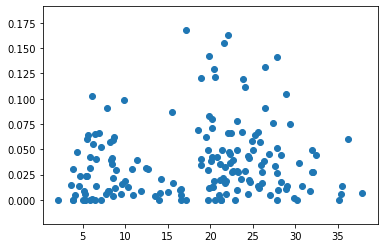

In [133]:
plt.scatter(final_data['% Obesity'], final_data['deathrate'])

### Further steps
Since the spread has just started in the less developped countries and statistics are behind, we wait for statistical inference

## Plots with Plotly

In [134]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
import pycountry_convert as pc

In [135]:
#Jupyter setup (to display in notebook)
init_notebook_mode(connected=True)

In [136]:
countries = np.asarray(list(final_data.index))
# Continent_code to Continent_names as a dictionary
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defining Function for getting continent code for country by using the pc library
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

#Collecting continent Information, insert at position 1, with column name 'continent'
final_data.insert(1,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])

In [137]:
final_data

,% Obesity,continent,Year,deathrate
Country,,,,
Afghanistan,5.5,Asia,2016.0,0.023259
Albania,21.7,Europe,2016.0,0.032666
Algeria,27.4,Africa,2016.0,0.076047
Andorra,25.6,Europe,2016.0,0.067017
Angola,8.2,Africa,2016.0,0.057692
Antigua and Barbuda,18.9,North America,2016.0,0.120000
Argentina,28.3,South America,2016.0,0.044613
Armenia,20.2,Asia,2016.0,0.012696
Australia,29.0,Australia,2016.0,0.014140


In [138]:
final_data.loc[final_data['continent']=='Others']

,% Obesity,continent,Year,deathrate
Country,,,,
Burma,5.8,Others,2016.0,0.031088
Cote d'Ivoire,10.3,Others,2016.0,0.013005
"Korea, South",4.7,Others,2016.0,0.023672
Timor-Leste,3.8,Others,2016.0,0.000000


In [139]:
final_data.loc[final_data.index=='Timor-Leste', 'continent'] = 'Asia'
final_data.loc[final_data.index=='Korea, South', 'continent'] = 'Asia'
final_data.loc[final_data.index=='Burma', 'continent'] = 'Asia'
final_data.loc[final_data.index=="Cote d'Ivoire" , 'continent'] = 'Africa'

In [140]:
fig = px.scatter(final_data,
    x = '% Obesity',
    y = 'deathrate',
    hover_name=countries,
    color='continent',
    title='Obesity vs. death rate')
fig.show()